# Project Linear Regression; Boston Housing Price

You can find the video explaning this notebook on the resources/ Unit3 in the OWL website.  

In [1]:
# Yes! sklearn has lots of datasets!  
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

We have not talked about numpy yet! Lets do it now:
- Numpy is a Python package for scientific computing 
- It provides multidimensional array object
- Many mathematical operations on vectors and matrixcies can be done using numpy; and it is fast (vectorized code)!
- you can learn more about numpy here: https://numpy.org/doc/stable/user/whatisnumpy.html




In [2]:
# Load the housing dataset
boston = load_boston()

In [3]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [4]:
# Lets make a dataframe!
boston_df = pd.DataFrame(boston.data)

# column names
boston_df.columns = boston.feature_names


boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [5]:
target_df = pd.DataFrame(boston.target)

target_df.columns = ['price']

target_df

,price
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


Text(0, 0.5, 'Counts')

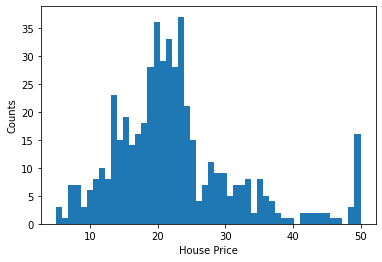

In [6]:
# Histogram of prices (this is the target of our dataset)
plt.hist(target_df['price'],bins=50)

#label
plt.xlabel('House Price')
plt.ylabel('Counts')

We want to find the best linear fit, aka we are using linear regression. As explained in details in Unit 3, the goal of linear regression is to calculate the best coefficients to minimize the residual sum of squared between the the actual target and the estimated target values. We can use Python's Scikit-Learn for this purpose!

See this link for more info about Scikit-Learn linear regression module:
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [7]:
# import the library
from sklearn.linear_model import LinearRegression

Steps to take:

- Create a LinearRegression *object* : lreg = LinearRegression()
- Fit a linear model : lreg.fit(X,Y) --> We can see intercept and coefficient values
- Predict Y using the linear model with the estimated coefficients : lreg.predict()
- Check how good is our model/fit: lreg.score()



In [8]:
Y = target_df['price']
X = boston_df

In [9]:

lreg = LinearRegression(normalize=True)

We made the object and we assign True to normalize. Normalize is one of the parameters of this object, when it sets to True, X will be normalized.   



In [10]:
# fit the model 
lreg.fit(X,Y)

LinearRegression(normalize=True)

In [11]:
# find the intercept 
lreg.intercept_

36.45948838508991

In [12]:
# find the coefficints for each feature (we have 13 features and for each we will get a coefficient)
lreg.coef_

array([-1.08011358e-01,  4.64204584e-02,  2.05586264e-02,  2.68673382e+00,
       -1.77666112e+01,  3.80986521e+00,  6.92224640e-04, -1.47556685e+00,
        3.06049479e-01, -1.23345939e-02, -9.52747232e-01,  9.31168327e-03,
       -5.24758378e-01])

In [13]:
boston_df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [14]:
# Make a dataframe of features 
coeff_df = pd.DataFrame(boston_df.columns)
coeff_df.columns = ['Features']

# add a new column for the coefficients
coeff_df["Coefficient Estimate"] = lreg.coef_

# Show
coeff_df

,Features,Coefficient Estimate
0,CRIM,-0.108011
1,ZN,0.046420
2,INDUS,0.020559
3,CHAS,2.686734
4,NOX,-17.766611
5,RM,3.809865
6,AGE,0.000692
7,DIS,-1.475567
8,RAD,0.306049
9,TAX,-0.012335


Remember when we talked about the feature importance in Unit 2? Here we go! We can see some of these features are more important than the others! 

# How about doing some prediction? 

We can use the dataset we have; and partition it to test and train set. Using training data, the algorithm *learns* the coeffcients. Then we use the test data (the algorithm has never seen the test data during the training) to do predictions; and we can compare the predicted value with the actual one! 

- To split the data to train and test, we can use skit-learn as shown below

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.30)

# we assign 30% of data for test

In [16]:
# Create our regression object
lreg = LinearRegression()

# Once again do a linear regression, except only on the training sets this time
lreg.fit(X_train,Y_train)

LinearRegression()

In [17]:
Y_pred = lreg.predict(X_test)

# Residual Plots

As mentioned in Unit 2, Lesson 4 plotting residulas is useful to realize how good our trained model works on the test set. As shown below, the residulas dont have any specific patter (which is a sign of having a good model). And, thye are wihin an acceptable range. 

Text(0.5, 1.0, 'Residual Plots')

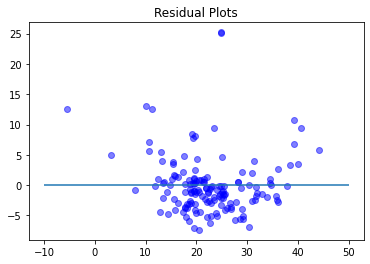

In [18]:
# Scatter plot the testing data
test = plt.scatter(Y_pred,(Y_test-Y_pred),c='b',alpha=0.5)

# Plot a horizontal axis line at 0
plt.hlines(y=0,xmin=-10,xmax=50)

#Labels
plt.title('Residual Plots')

In [19]:
# MSE for test
MSE = np.mean((Y_test - Y_pred) ** 2)
print(MSE)

23.68928100975844


In [20]:
# MSE for training
MSE = np.mean((Y_train - lreg.predict(X_train)) ** 2)
print(MSE)

21.469918749167434
